## Laboratorio 4 
Ignacio Méndez Alvarez (22613) y Diego Soto Flores (22737)

In [3]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
import openeo
import pandas as pd
import os, re
import numpy as np
import pandas as pd
import rasterio
import matplotlib.pyplot as plt

In [2]:
connection = openeo.connect("https://openeo.dataspace.copernicus.eu").authenticate_oidc()

Visit https://identity.dataspace.copernicus.eu/auth/realms/CDSE/device?user_code=BXTI-TKAS 📋 to authenticate.

✅ Authorized successfully

Authenticated using device code flow.


In [3]:
lago_atitlan = {
    "west": -91.326256,
    "east": -91.07151,
    "south": 14.5948,
    "north": 14.750979
}
lago_amatitlan = {
    "west": -90.638065,
    "east": -90.512924,
    "south": 14.412347,
    "north": 14.493799
}

In [4]:
fechas = ["2025-02-07", "2025-02-10", "2025-02-25", "2025-02-27", "2025-03-02", "2025-03-04", "2025-03-07", "2025-03-09", "2025-03-12", "2025-03-14", "2025-03-19", "2025-03-22", "2025-03-24", "2025-03-26", "2025-04-03", "2025-04-11", "2025-04-13", "2025-04-15", "2025-04-16", "2025-04-18", "2025-04-28", "2025-05-03", "2025-05-13", "2025-05-28", "2025-07-10", "2025-07-17", "2025-07-20", "2025-07-24", "2025-08-01"]

In [5]:
print(len(fechas))

29


In [5]:
for fecha in fechas:
    try:
        # Lago Atitlán
        atitlan_cube = connection.load_collection(
            "SENTINEL2_L2A",
            spatial_extent=lago_atitlan,
            temporal_extent=[fecha, fecha],  # o un rango más amplio
            bands=["B02","B03","B04", "B05", "B07", "B08", "B8A", "B11", "B12"]
        )

        result_graph = atitlan_cube.save_result(format="GTIFF")
        job = connection.create_job(result_graph)
        job.start_and_wait()
        job.download_results(f"imgs1/{fecha}.tiff")

        # Lago Amatitlán
        amatitlan_cube = connection.load_collection(
            "SENTINEL2_L2A",
            spatial_extent=lago_amatitlan,
            temporal_extent=[fecha, fecha],
            bands=["B02","B03","B04", "B05", "B07", "B08", "B8A", "B11", "B12"]
        )

        result_graph = amatitlan_cube.save_result(format="GTIFF")
        job = connection.create_job(result_graph)
        job.start_and_wait()
        job.download_results(f"imgs2/{fecha}.tiff")

    except Exception as e:
        print(f"No se pudo procesar la fecha {fecha}: {e}")
        continue

0:00:00 Job 'j-2508130457244cd6886282ba50d443c2': send 'start'
0:00:14 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:19 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:25 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:34 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:44 Job 'j-2508130457244cd6886282ba50d443c2': created (progress 0%)
0:00:56 Job 'j-2508130457244cd6886282ba50d443c2': running (progress N/A)
0:01:12 Job 'j-2508130457244cd6886282ba50d443c2': running (progress N/A)
0:01:31 Job 'j-2508130457244cd6886282ba50d443c2': running (progress N/A)
0:01:56 Job 'j-2508130457244cd6886282ba50d443c2': finished (progress 100%)


C:\Users\dfsf2\AppData\Local\Temp\ipykernel_22804\1137818.py:14: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results(f"imgs1/{fecha}.tiff")
c:\Users\dfsf2\anaconda3\Lib\site-packages\openeo\rest\job.py:199: UserDeprecationWarning: Call to deprecated method get_result. (Use `BatchJob.get_results` instead.) -- Deprecated since version 0.4.10.
  return self.get_result().download_files(target)
c:\Users\dfsf2\anaconda3\Lib\site-packages\openeo\rest\job.py:203: UserDeprecationWarning: Call to deprecated class _Result. (Use `JobResults` instead) -- Deprecated since version 0.4.10.
  return _Result(self)


0:00:00 Job 'j-25081305013345cabc4d7ecd9cf98dfe': send 'start'
0:00:13 Job 'j-25081305013345cabc4d7ecd9cf98dfe': created (progress 0%)
0:00:18 Job 'j-25081305013345cabc4d7ecd9cf98dfe': created (progress 0%)
0:00:25 Job 'j-25081305013345cabc4d7ecd9cf98dfe': created (progress 0%)
0:00:33 Job 'j-25081305013345cabc4d7ecd9cf98dfe': created (progress 0%)
0:00:43 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:00:56 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:01:11 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:01:31 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:01:56 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:02:26 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:03:04 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:03:51 Job 'j-25081305013345cabc4d7ecd9cf98dfe': queued (progress 0%)
0:04:52 Job 'j-25081305013345cabc4d7ecd9cf98dfe': running (progress N/A)
0:05:52 

C:\Users\dfsf2\AppData\Local\Temp\ipykernel_22804\1137818.py:27: UserDeprecationWarning: Call to deprecated method download_results. (Instead use `BatchJob.get_results` and the more flexible download functionality of `JobResults`) -- Deprecated since version 0.4.10.
  job.download_results(f"imgs2/{fecha}.tiff")


0:00:00 Job 'j-2508130508034148a2404456d1e09266': send 'start'
0:00:13 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:18 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:25 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:33 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:43 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:00:55 Job 'j-2508130508034148a2404456d1e09266': created (progress 0%)
0:01:11 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:01:30 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:01:55 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:02:25 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:03:02 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:03:49 Job 'j-2508130508034148a2404456d1e09266': queued (progress 0%)
0:04:48 Job 'j-2508130508034148a2404456d1e09266': running (progress N/A)
0:05:4

Error en Amatitlan/2025-04-03.tiff: 'Amatitlan\2025-04-03.tiff' not recognized as being in a supported file format.
Amatitlan: timeseries_Amatitlan.csv -> 18 filas


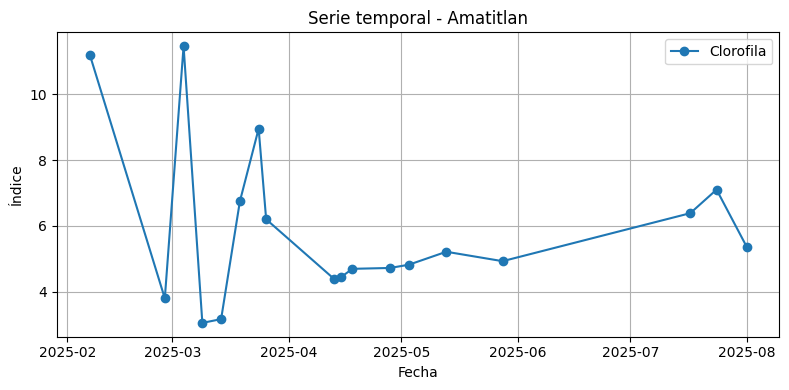

Error en Atitlan/2025-04-03.tiff: Read failed. See previous exception for details.
Atitlan: timeseries_Atitlan.csv -> 28 filas


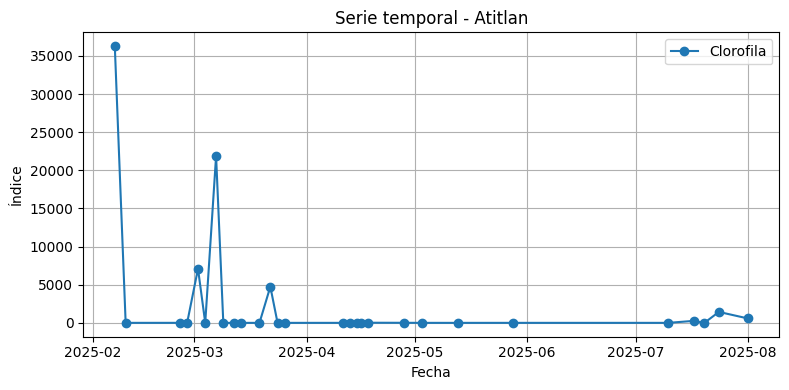

timeseries_all_lakes.csv


In [6]:

LAKES = {"Amatitlan": "Amatitlan", "Atitlan": "Atitlan"} 
DATE_RE = re.compile(r"(\d{4}-\d{2}-\d{2})")
MNDWI_THRESHOLD = 0.42
NDWI_THRESHOLD  = 0.40
FILTER_UABS     = True


def safe_div(a, b):
    out = np.zeros_like(a, dtype=np.float32)
    m = b != 0
    out[m] = a[m] / b[m]
    return out

def ndvi(nir, red):        return safe_div(nir - red, nir + red)
def mndwi(g, s1):         return safe_div(g - s1, g + s1)
def ndwi(g, nir):         return safe_div(g - nir, g + nir)
def ndwi_leaves(nir, s1): return safe_div(nir - s1, nir + s1)
def awei_sh(b, g, nir, s1, s2):  return b + 2.5*g - 1.5*(nir + s1) - 0.25*s2
def awei_nsh(g, nir, s1):        return 4*(g - s1) - (0.25*nir + 2.75*s1)
def dbsi(s1, g, ndvi_val):       return safe_div((s1 - g), (s1 + g)) - ndvi_val
def fai(red665, re783, nir865):  return (re783 - red665) - (nir865 - red665) * ((783-665)/(865-665))
def ndci(red665, red705):        return safe_div((red705 - red665), (red705 + red665))
def safe_mean(x):
    x = x.astype("float32")
    x = x[np.isfinite(x)]
    return float(x.mean()) if x.size else np.nan


def process_tif(path):
    with rasterio.open(path) as src:
        arr = src.read()

        # máscara NoData
        if src.nodata is not None:
            nodata_mask = np.any(arr == src.nodata, axis=0) if arr.ndim == 3 else (arr == src.nodata)
        else:
            nodata_mask = np.zeros(arr.shape[-2:], bool) if arr.ndim == 3 else np.zeros(arr.shape, bool)

        if src.count >= 9:
            B02,B03,B04,B05,B07,B08,B8A,B11,B12 = [arr[i-1].astype("float32") for i in [1,2,3,4,5,6,7,8,9]]
            for b in (B02,B03,B04,B05,B07,B08,B8A,B11,B12):
                b[nodata_mask] = np.nan

            ndvi_v   = ndvi(B08, B04)
            mndwi_v  = mndwi(B03, B11)
            ndwi_v   = ndwi(B03, B08)
            ndwi_l_v = ndwi_leaves(B08, B11)
            awei_sh_v  = awei_sh(B02, B03, B08, B11, B12)
            awei_nsh_v = awei_nsh(B03, B08, B11)
            dbsi_v   = dbsi(B11, B03, ndvi_v)

            # máscara de agua
            water = (
                (mndwi_v > MNDWI_THRESHOLD) |
                (ndwi_v  > NDWI_THRESHOLD)  |
                (awei_nsh_v > 0.1879)       |
                (awei_sh_v  > 0.1112)       |
                (ndvi_v < -0.2)             |
                (ndwi_l_v > 1)
            )
            if FILTER_UABS:
                water = water & ~((awei_nsh_v <= -0.03) | (dbsi_v > 0))

            # FAI y clorofila
            FAIv  = fai(B04, B07, B8A)
            NDCIv = ndci(B04, B05)
            chl   = 826.57*(NDCIv**3) - 176.43*(NDCIv**2) + 19*NDCIv + 4.071
            chl   = np.clip(chl, 0, None)  # evita valores negativos

            water_px = np.isfinite(chl) & water
            open_px  = water_px & (FAIv <= 0.08)
            mean_chl_open = safe_mean(chl[open_px])

            ndvi_mean = safe_mean(ndvi_v[water])
            ndwi_mean = safe_mean(ndwi_v[water])

            return {
                "mode": "multiband",
                "value": mean_chl_open,
                "NDVI_mean": ndvi_mean,
                "NDWI_mean": ndwi_mean
            }
        else:
            band = arr[0].astype("float32")
            band[nodata_mask] = np.nan
            return {
                "mode": "singleband",
                "value": safe_mean(band),
                "NDVI_mean": np.nan,
                "NDWI_mean": np.nan
            }


all_rows = []

for lake, folder in LAKES.items():
    rows = []
    for fname in sorted(os.listdir(folder)):
        if not fname.lower().endswith((".tif", ".tiff")):
            continue
        m = DATE_RE.search(fname)
        if not m:
            continue
        date = pd.to_datetime(m.group(1))
        path = os.path.join(folder, fname)

        try:
            met = process_tif(path)
            rows.append({
                "date": date,
                "value": met["value"],
                "NDVI_mean": met["NDVI_mean"],
                "NDWI_mean": met["NDWI_mean"]
            })
        except Exception as e:
            print(f"Error en {folder}/{fname}: {e}")

    df = pd.DataFrame(rows).sort_values("date").set_index("date")
    out_csv = f"timeseries_{lake}.csv"
    df.to_csv(out_csv)
    print(f"{lake}: {out_csv} -> {len(df)} filas")

    # Mostrar la gráfica 2 segundos y cerrar
    if not df.empty:
        plt.figure(figsize=(8,4))
        plt.plot(df.index, df["value"], marker="o", label="Clorofila")
        plt.title(f"Serie temporal - {lake}")
        plt.xlabel("Fecha")
        plt.ylabel("Índice")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show(block=False)
        plt.pause(2)
        plt.close()

    # Guardar filas para CSV combinado
    for d, row in df.iterrows():
        all_rows.append({
            "lake": lake,
            "date": d,
            "value": row["value"],
            "NDVI_mean": row["NDVI_mean"],
            "NDWI_mean": row["NDWI_mean"]
        })

if all_rows:
    all_df = pd.DataFrame(all_rows).sort_values(["lake","date"])
    all_df.to_csv("timeseries_all_lakes.csv", index=False)
    print("timeseries_all_lakes.csv")


#### Estadísticas por lago

In [7]:
stats_rows = []
for lake in LAKES.keys():
    df_lake = pd.read_csv(f"timeseries_{lake}.csv", parse_dates=["date"]).set_index("date")
    desc = df_lake.describe()[["value","NDVI_mean","NDWI_mean"]]
    desc.to_csv(f"stats_{lake}.csv")
    print(f"Estadísticos -> stats_{lake}.csv")
    stats_rows.append(desc.assign(lake=lake))

if stats_rows:
    stats_all = pd.concat(stats_rows, axis=0)
    print(stats_all)

Estadísticos -> stats_Amatitlan.csv
Estadísticos -> stats_Atitlan.csv
              value  NDVI_mean  NDWI_mean       lake
count     18.000000  18.000000  18.000000  Amatitlan
mean       5.927295  -0.015551   0.289644  Amatitlan
std        2.434554   0.150362   0.110814  Amatitlan
min        3.056589  -0.274690   0.138436  Amatitlan
25%        4.513748  -0.123617   0.219339  Amatitlan
50%        5.072861  -0.057455   0.277203  Amatitlan
75%        6.655895   0.120614   0.340021  Amatitlan
max       11.456603   0.243798   0.623092  Amatitlan
count     28.000000  28.000000  28.000000    Atitlan
mean    2583.869441   0.037148   0.438654    Atitlan
std     7892.286623   0.201574   0.265304    Atitlan
min        0.000000  -0.143276   0.064235    Atitlan
25%        2.685931  -0.117587   0.313300    Atitlan
50%        3.444403  -0.021784   0.415086    Atitlan
75%       80.260397   0.057500   0.519820    Atitlan
max    36271.015625   0.598885   1.114484    Atitlan


#### Picos en fechas importantes

Picos Amatitlan: —


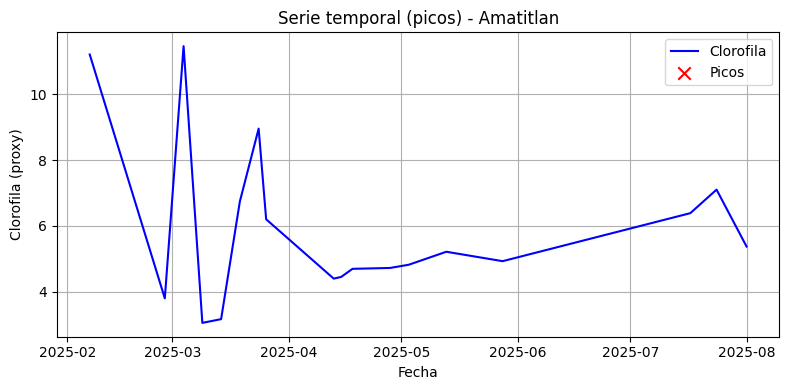

Picos Atitlan: —


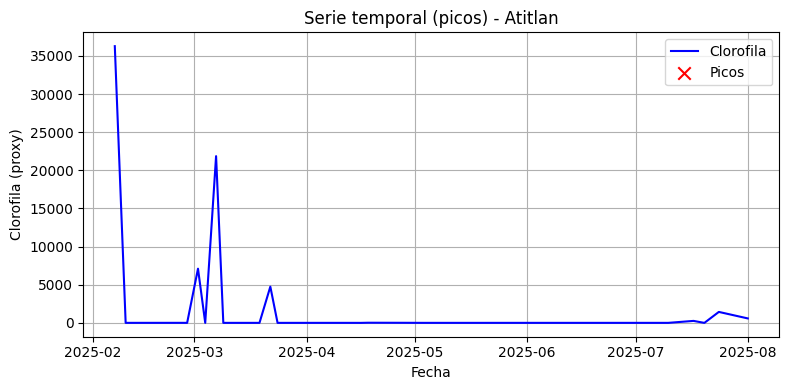

In [12]:
def detect_peaks(series, window=3, z=1.5):
    s = series.astype("float32").copy()
    roll_mean = s.rolling(window, min_periods=1).mean()
    roll_std  = s.rolling(window, min_periods=1).std().replace(0, np.nan)
    zscore = (s - roll_mean) / roll_std
    return (zscore >= z) & np.isfinite(zscore)

for lake in LAKES.keys():
    df_lake = pd.read_csv(f"timeseries_{lake}.csv", parse_dates=["date"]).set_index("date")
    if df_lake.empty: 
        continue

    peaks_mask = detect_peaks(df_lake["value"], window=3, z=1.5)
    peak_dates = list(df_lake.index[peaks_mask])
    print(f"Picos {lake}: " + (", ".join(d.strftime("%Y-%m-%d") for d in peak_dates) if peak_dates else "—"))

    plt.figure(figsize=(8,4))
    plt.plot(df_lake.index, df_lake["value"], color="blue", label="Clorofila")  
    plt.scatter(df_lake.index[peaks_mask], df_lake["value"][peaks_mask],
                s=80, marker="x", color="red", label="Picos")  
    plt.title(f"Serie temporal (picos) - {lake}")
    plt.xlabel("Fecha")
    plt.ylabel("Clorofila (proxy)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(2)
    plt.close()

    

[Amatitlan] Picos: 2025-05-13, 2025-07-24


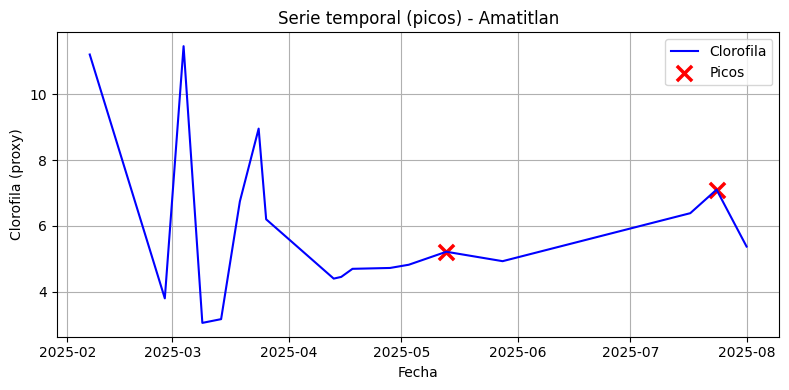

[Atitlan] Picos: 2025-03-02, 2025-03-07, 2025-03-22, 2025-04-18, 2025-07-17, 2025-07-24


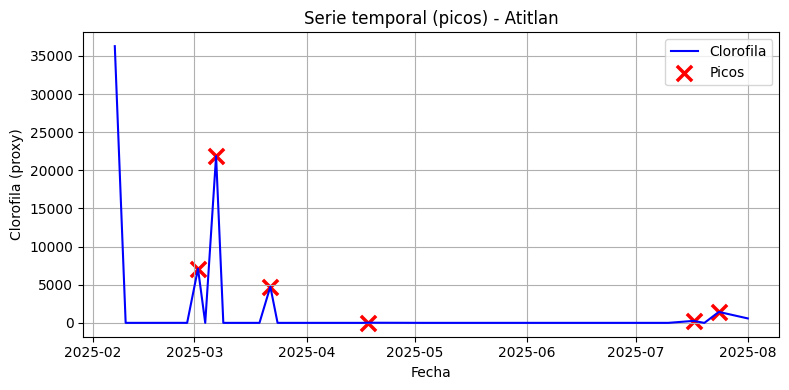

In [14]:
def detect_peaks(series, window=5, z=1.0, use_mad=True):
    """
    Detecta picos usando z-score (media o mediana + desviación) y condición de máximo local.
    window: tamaño de ventana móvil
    z: umbral de z-score (más bajo = más picos)
    use_mad: True -> mediana+MAD (robusto); False -> media+std
    """
    s = pd.Series(series).astype("float32").copy()

    if use_mad:
        roll_med = s.rolling(window, min_periods=1).median()
        mad = (np.abs(s - roll_med)).rolling(window, min_periods=1).median()
        denom = 1.4826 * mad.replace(0, np.nan)  # MAD->std
        zscore = (s - roll_med) / denom
    else:
        roll_mean = s.rolling(window, min_periods=1).mean()
        roll_std  = s.rolling(window, min_periods=1).std().replace(0, np.nan)
        zscore = (s - roll_mean) / roll_std

    is_local_max = (s.shift(1) < s) & (s.shift(-1) <= s)
    mask = (zscore >= z) & is_local_max & np.isfinite(zscore)
    return mask.fillna(False)

# --- Graficar series con picos ---
for lake in LAKES.keys():
    df_lake = pd.read_csv(f"timeseries_{lake}.csv", parse_dates=["date"]).set_index("date")
    if df_lake.empty:
        continue

    # Detectar picos (primero estricto, si no hay, usar más laxo)
    peaks_mask = detect_peaks(df_lake["value"], window=5, z=1.0, use_mad=True)
    if not peaks_mask.any():
        peaks_mask = detect_peaks(df_lake["value"], window=7, z=0.8, use_mad=True)

    # Fechas de picos
    peak_dates = list(df_lake.index[peaks_mask])
    if peak_dates:
        print(f"[{lake}] Picos: {', '.join(d.strftime('%Y-%m-%d') for d in peak_dates)}")
    else:
        print(f"[{lake}] No se detectaron picos.")

    # Gráfica con solo X en picos
    plt.figure(figsize=(8,4))
    plt.plot(df_lake.index, df_lake["value"], color="blue", label="Clorofila")  # línea sin marcador
    plt.scatter(df_lake.index[peaks_mask], df_lake["value"][peaks_mask],
                s=120, marker="x", linewidths=2.5, color="red", label="Picos")
    plt.title(f"Serie temporal (picos) - {lake}")
    plt.xlabel("Fecha")
    plt.ylabel("Clorofila (proxy)")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(2)
    plt.close()

#### Correlación NVDI y NDWI

[Amatitlan] r(NDVI,value)=0.005 (p=0.984) | r(NDWI,value)=0.335 (p=0.174)


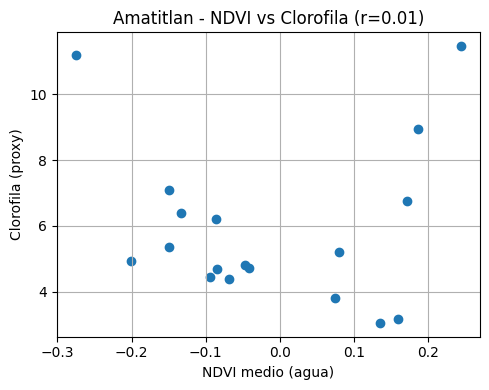

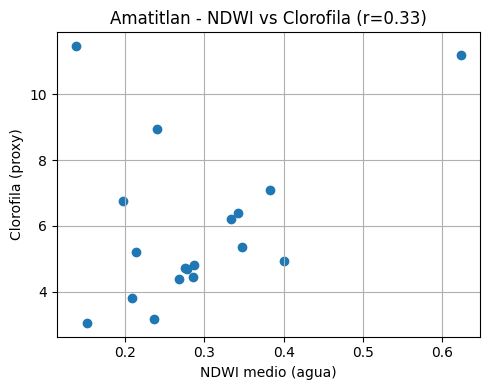

[Atitlan] r(NDVI,value)=0.711 (p=2.27e-05) | r(NDWI,value)=0.712 (p=2.18e-05)


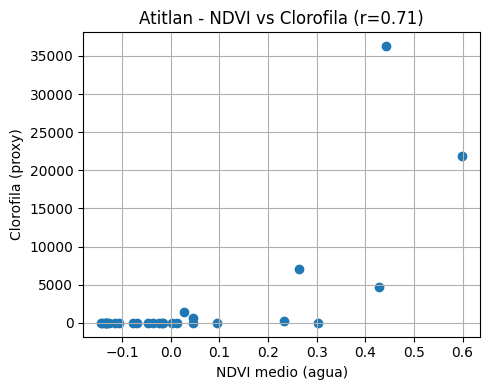

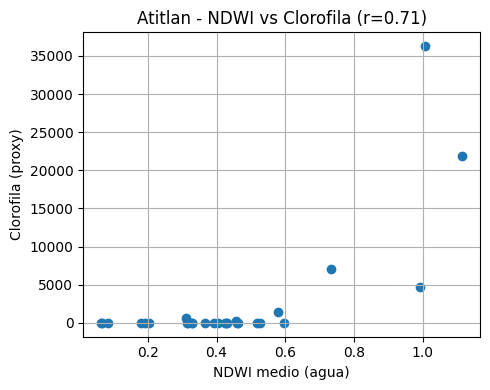

In [9]:
from scipy.stats import pearsonr
for lake in LAKES.keys():
    df_lake = pd.read_csv(f"timeseries_{lake}.csv", parse_dates=["date"]).set_index("date")
    dfc = df_lake.dropna(subset=["value","NDVI_mean","NDWI_mean"]).copy()
    if dfc.empty:
        continue

    r_ndvi, p_ndvi = pearsonr(dfc["NDVI_mean"], dfc["value"])
    r_ndwi, p_ndwi = pearsonr(dfc["NDWI_mean"], dfc["value"])
    print(f"[{lake}] r(NDVI,value)={r_ndvi:.3f} (p={p_ndvi:.3g}) | r(NDWI,value)={r_ndwi:.3f} (p={p_ndwi:.3g})")

    plt.figure(figsize=(5,4))
    plt.scatter(dfc["NDVI_mean"], dfc["value"])
    plt.title(f"{lake} - NDVI vs Clorofila (r={r_ndvi:.2f})")
    plt.xlabel("NDVI medio (agua)"); plt.ylabel("Clorofila (proxy)")
    plt.grid(True); plt.tight_layout()
    plt.show(block=False); plt.pause(2); plt.close()

    plt.figure(figsize=(5,4))
    plt.scatter(dfc["NDWI_mean"], dfc["value"])
    plt.title(f"{lake} - NDWI vs Clorofila (r={r_ndwi:.2f})")
    plt.xlabel("NDWI medio (agua)"); plt.ylabel("Clorofila (proxy)")
    plt.grid(True); plt.tight_layout()
    plt.show(block=False); plt.pause(2); plt.close()

In [23]:
def map_chl_open_from_tif(path):
    with rasterio.open(path) as src:
        arr = src.read()
        if src.nodata is not None:
            nodata_mask = np.any(arr == src.nodata, axis=0) if arr.ndim == 3 else (arr == src.nodata)
        else:
            nodata_mask = np.zeros(arr.shape[-2:], bool) if arr.ndim == 3 else np.zeros(arr.shape, bool)

        if src.count < 9:
            raise ValueError("Se requiere multibanda Sentinel-2 para el mapa.")

        B02,B03,B04,B05,B07,B08,B8A,B11,B12 = [arr[i-1].astype("float32") for i in [1,2,3,4,5,6,7,8,9]]
        for b in (B02,B03,B04,B05,B07,B08,B8A,B11,B12):
            b[nodata_mask] = np.nan

        # índices
        ndvi_v   = ndvi(B08, B04)
        mndwi_v  = mndwi(B03, B11)
        ndwi_v   = ndwi(B03, B08)
        ndwi_l_v = ndwi_leaves(B08, B11)
        awei_sh_v  = awei_sh(B02, B03, B08, B11, B12)
        awei_nsh_v = awei_nsh(B03, B08, B11)
        dbsi_v   = dbsi(B11, B03, ndvi_v)

        water = (
            (mndwi_v > MNDWI_THRESHOLD) |
            (ndwi_v  > NDWI_THRESHOLD)  |
            (awei_nsh_v > 0.1879)       |
            (awei_sh_v  > 0.1112)       |
            (ndvi_v < -0.2)             |
            (ndwi_l_v > 1)
        )
        if FILTER_UABS:
            water = water & ~((awei_nsh_v <= -0.03) | (dbsi_v > 0))

        FAIv  = fai(B04, B07, B8A)
        NDCIv = ndci(B04, B05)
        # fórmula de clorofila corregida
        chl   = 826.57*(NDCIv**3) - 176.43(NDCIv**2) + 19*NDCIv + 4.071
        chl   = np.clip(chl, 0, None)  # evitar valores negativos

        # solo agua sin vegetación flotante
        open_px = water & (FAIv <= 0.08)
        chl_open = np.where(open_px & np.isfinite(chl), chl, np.nan)
        return chl_open

def show_static_map_for_date(lake, folder, target_date, vmax=None):
    # busca archivo que contenga target_date (YYYY-MM-DD) en nombre
    found = None
    for fname in os.listdir(folder):
        if target_date in fname and fname.lower().endswith((".tif",".tiff")):
            found = os.path.join(folder, fname)
            break
    if not found:
        print(f"No encontré {target_date} en {lake}")
        return

    chl_open = map_chl_open_from_tif(found)
    plt.figure(figsize=(6,5))
    im = plt.imshow(chl_open, cmap="viridis", vmin=0, vmax=vmax)
    plt.title(f"{lake} - Clorofila (agua sin vegetación) - {target_date}")
    cbar = plt.colorbar(im)
    cbar.set_label("mg/m³ (proxy)")
    plt.axis("off")
    plt.tight_layout()
    plt.show(block=False)
    plt.pause(2)
    plt.close()

# Ejemplos: ajusta fechas a las que realmente tengas en tus carpetas
show_static_map_for_date("Amatitlan", LAKES["Amatitlan"], "2025-02-07", vmax=None)
show_static_map_for_date("Atitlan",  LAKES["Atitlan"],  "2025-02-07", vmax=None)

<>:39: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
<>:39: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
C:\Users\nanum\AppData\Local\Temp\ipykernel_43696\929327963.py:39: SyntaxWarning: 'float' object is not callable; perhaps you missed a comma?
  chl   = 826.57*(NDCIv**3) - 176.43(NDCIv**2) + 19*NDCIv + 4.071


TypeError: 'float' object is not callable